In [2]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [9]:
data = pd.read_csv(r"../dataset/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
data.shape

(400, 26)

In [12]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [13]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_ceratinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell','red_blood_cell','hypertension',
              'diabetesmellitus','coronary_artery_disease','appetite','pedal_adema','anemia','class']
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_ceratinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell',
       'red_blood_cell', 'hypertension', 'diabetesmellitus',
       'coronary_artery_disease', 'appetite', 'pedal_adema', 'anemia',
       'class'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_ceratinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [15]:
data.drop('id',axis=1,inplace=True)
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_ceratinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell            True
red_blood_cell              True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_adema                 True
anemia                      True
class                      False
dtype: bool

In [16]:
# Convert problematic columns to numeric before filling missing values
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['red_blood_cell'] = pd.to_numeric(data['red_blood_cell'], errors='coerce')
data['white_blood_cell'] = pd.to_numeric(data['white_blood_cell'], errors='coerce')

# Then fill missing values using mean
data['blood glucose random'] = data['blood glucose random'].fillna(data['blood glucose random'].mean())
data['blood_pressure'] = data['blood_pressure'].fillna(data['blood_pressure'].mean())
data['blood_urea'] = data['blood_urea'].fillna(data['blood_urea'].mean())
data['hemoglobin'] = data['hemoglobin'].fillna(data['hemoglobin'].mean())
data['packed_cell_volume'] = data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())
data['potassium'] = data['potassium'].fillna(data['potassium'].mean())
data['serum_ceratinine'] = data['serum_ceratinine'].fillna(data['serum_ceratinine'].mean())
data['sodium'] = data['sodium'].fillna(data['sodium'].mean())
data['white_blood_cell'] = data['white_blood_cell'].fillna(data['white_blood_cell'].mean())


In [17]:
data['age'] = data['age'].fillna(data['age'].mode()[0])
data['hypertension'] = data['hypertension'].fillna(data['hypertension'].mode()[0])
data['pus_cell_clumps'] = data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0])
data['appetite'] = data['appetite'].fillna(data['appetite'].mode()[0])
data['albumin'] = data['albumin'].fillna(data['albumin'].mode()[0])
data['pus_cell'] = data['pus_cell'].fillna(data['pus_cell'].mode()[0])
data['red_blood_cells'] = data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0])
data['coronary_artery_disease'] = data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0])
data['bacteria'] = data['bacteria'].fillna(data['bacteria'].mode()[0])
data['anemia'] = data['anemia'].fillna(data['anemia'].mode()[0])
data['sugar'] = data['sugar'].fillna(data['sugar'].mode()[0])
data['diabetesmellitus'] = data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0])
data['pedal_adema'] = data['pedal_adema'].fillna(data['pedal_adema'].mode()[0])
data['specific_gravity'] = data['specific_gravity'].fillna(data['specific_gravity'].mode()[0])


In [18]:
print(data.isnull().sum())


age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells              0
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
blood glucose random         0
blood_urea                   0
serum_ceratinine             0
sodium                       0
potassium                    0
hemoglobin                   0
packed_cell_volume           0
white_blood_cell             0
red_blood_cell             131
hypertension                 0
diabetesmellitus             0
coronary_artery_disease      0
appetite                     0
pedal_adema                  0
anemia                       0
class                        0
dtype: int64


In [19]:
catcols = set(data.select_dtypes(include=['object', 'category']).columns)
print(catcols)


{'bacteria', 'hypertension', 'diabetesmellitus', 'anemia', 'pus_cell_clumps', 'pus_cell', 'coronary_artery_disease', 'pedal_adema', 'appetite', 'class', 'red_blood_cells'}


In [20]:
for i in catcols:
  print("Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns : bacteria
Counter({'notpresent': 378, 'present': 22})
************************************************************************************************************************

Columns : hypertension
Counter({'no': 253, 'yes': 147})
************************************************************************************************************************

Columns : diabetesmellitus
Counter({'no': 260, 'yes': 134, '\tno': 3, '\tyes': 2, ' yes': 1})
************************************************************************************************************************

Columns : anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Columns : pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
************************************************************************************************************************

Columns : pus_cell
Counter({'normal': 324, 'abnormal': 76}

In [21]:
catcols=['anemia','pedal_adema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus'
,'hypertension','pus_cell','pus_cell_clumps','red_blood_cell']

In [22]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_adema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary_arter

In [23]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'bacteria', 'blood glucose random', 'diabetesmellitus', 'potassium', 'red_blood_cell', 'hypertension', 'white_blood_cell', 'anemia', 'coronary_artery_disease', 'serum_ceratinine', 'red_blood_cells', 'specific_gravity', 'age', 'pus_cell_clumps', 'albumin', 'packed_cell_volume', 'blood_pressure', 'class', 'blood_urea', 'pus_cell', 'pedal_adema', 'sodium', 'appetite', 'sugar', 'hemoglobin'}


In [24]:
for i in contcols:
  print("Continuous Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continuous Columns : bacteria
Counter({0: 378, 1: 22})
************************************************************************************************************************

Continuous Columns : blood glucose random
Counter({148.0365168539326: 44, 99.0: 10, 100.0: 9, 93.0: 9, 107.0: 8, 117.0: 6, 140.0: 6, 92.0: 6, 109.0: 6, 131.0: 6, 130.0: 6, 70.0: 5, 114.0: 5, 95.0: 5, 123.0: 5, 124.0: 5, 102.0: 5, 132.0: 5, 104.0: 5, 125.0: 5, 122.0: 5, 121.0: 4, 106.0: 4, 76.0: 4, 91.0: 4, 129.0: 4, 133.0: 4, 94.0: 4, 88.0: 4, 118.0: 4, 139.0: 4, 111.0: 4, 113.0: 4, 120.0: 4, 119.0: 4, 74.0: 3, 108.0: 3, 171.0: 3, 137.0: 3, 79.0: 3, 150.0: 3, 112.0: 3, 127.0: 3, 219.0: 3, 172.0: 3, 89.0: 3, 128.0: 3, 214.0: 3, 105.0: 3, 78.0: 3, 103.0: 3, 82.0: 3, 97.0: 3, 81.0: 3, 138.0: 2, 490.0: 2, 208.0: 2, 98.0: 2, 204.0: 2, 207.0: 2, 144.0: 2, 253.0: 2, 141.0: 2, 86.0: 2, 360.0: 2, 163.0: 2, 158.0: 2, 165.0: 2, 169.0: 2, 210.0: 2, 101.0: 2, 153.0: 2, 213.0: 2, 424.0: 2, 303.0: 2, 192.0: 2, 80.0: 2, 110.0: 

In [25]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'bacteria', 'blood glucose random', 'diabetesmellitus', 'potassium', 'red_blood_cell', 'hypertension', 'white_blood_cell', 'anemia', 'coronary_artery_disease', 'serum_ceratinine', 'red_blood_cells', 'age', 'pus_cell_clumps', 'packed_cell_volume', 'blood_pressure', 'class', 'blood_urea', 'pus_cell', 'pedal_adema', 'sodium', 'appetite', 'hemoglobin'}


In [26]:
contcols.add('red_blood_cell')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell')
print(contcols)

{'bacteria', 'blood glucose random', 'diabetesmellitus', 'potassium', 'red_blood_cell', 'hypertension', 'white_blood_cell', 'anemia', 'coronary_artery_disease', 'serum_ceratinine', 'red_blood_cells', 'age', 'pus_cell_clumps', 'packed_cell_volume', 'blood_pressure', 'class', 'blood_urea', 'pus_cell', 'pedal_adema', 'sodium', 'appetite', 'hemoglobin'}


In [27]:
contcols.add('specific_gravity')
contcols.add('albumin')
contcols.add('sugar')
print(contcols)

{'bacteria', 'blood glucose random', 'diabetesmellitus', 'potassium', 'red_blood_cell', 'hypertension', 'white_blood_cell', 'anemia', 'coronary_artery_disease', 'serum_ceratinine', 'red_blood_cells', 'specific_gravity', 'age', 'pus_cell_clumps', 'albumin', 'packed_cell_volume', 'blood_pressure', 'class', 'blood_urea', 'pus_cell', 'pedal_adema', 'sodium', 'appetite', 'sugar', 'hemoglobin'}


In [28]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [29]:
data['diabetesmellitus'] = data.diabetesmellitus.replace('\tno','no')
c(data['diabetesmellitus'])

Counter({3: 260, 4: 134, 0: 3, 1: 2, 2: 1})

In [30]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood glucose random,blood_urea,...,packed_cell_volume,white_blood_cell,red_blood_cell,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_adema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.675000,76.469072,1.017712,0.90000,0.395000,0.810000,0.105000,0.055000,148.036517,57.425722,...,38.884498,8406.122449,31.570000,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,17.022008,13.476298,0.005434,1.31313,1.040038,0.392792,0.306937,0.228266,74.782634,49.285887,...,8.151081,2523.219976,12.513656,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,...,9.000000,2200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,0.000000,0.000000,101.000000,27.000000,...,34.000000,6975.000000,23.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,0.000000,0.000000,126.000000,44.000000,...,38.884498,8406.122449,32.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,0.000000,0.000000,150.000000,61.750000,...,44.000000,9400.000000,45.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,...,54.000000,26400.000000,45.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


C:\Users\Disha\AppData\Local\Temp\ipykernel_1148\4156840497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

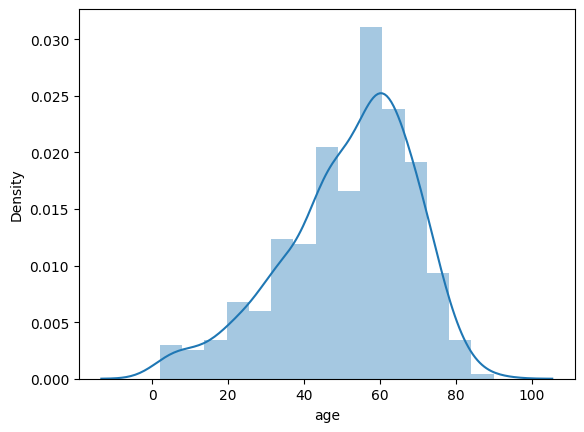

In [31]:
sns.distplot(data.age)

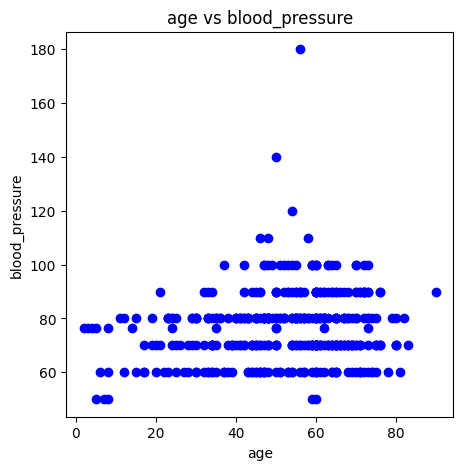

In [32]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title('age vs blood_pressure')
plt.show()

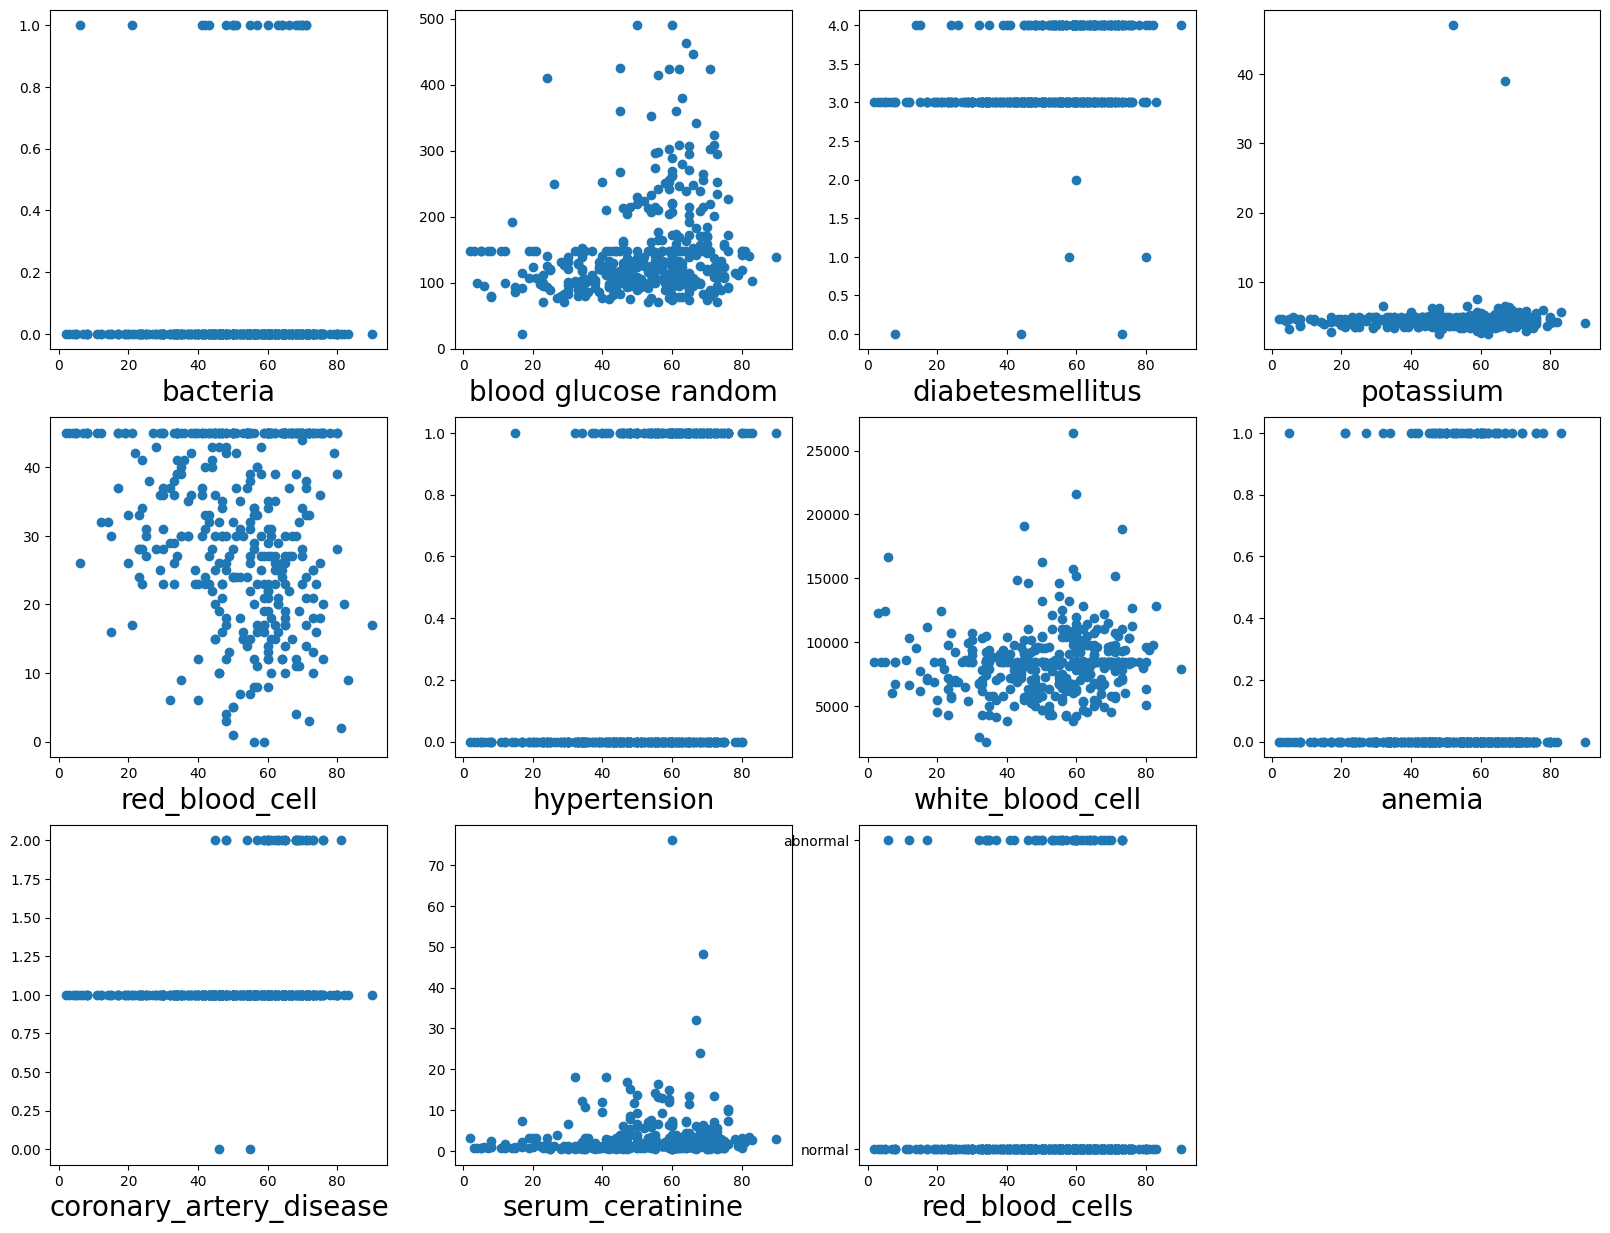

In [33]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1
for column in contcols:
  if plotnumber<=11:
    ax = plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)

  plotnumber+=1
plt.show()

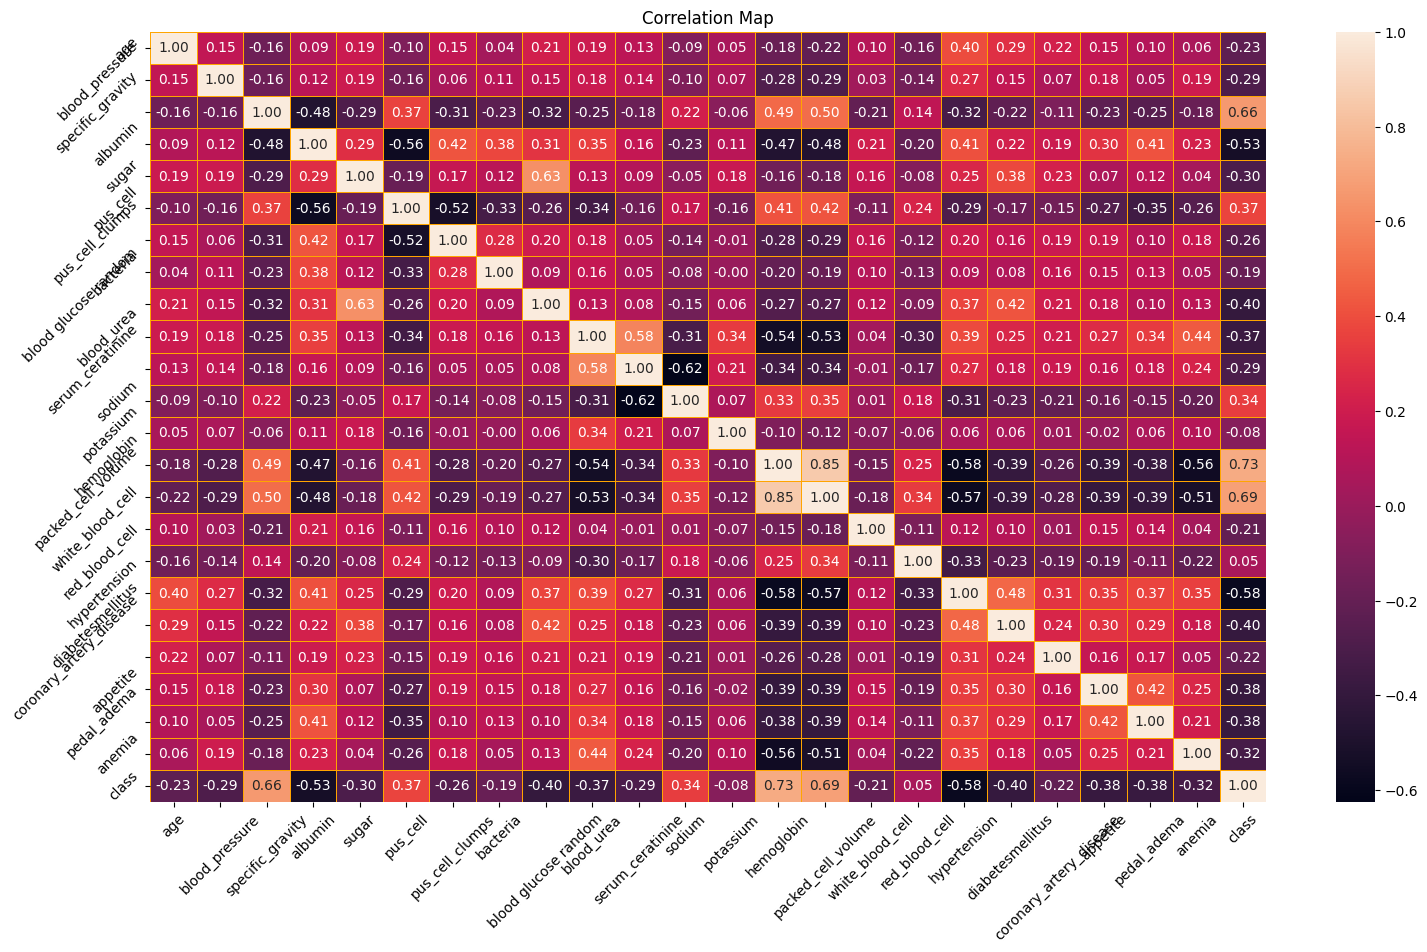

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Plot correlation heatmap
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", ax=ax, linewidths=0.5, linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation Map")
plt.show()


<Axes: ylabel='count'>

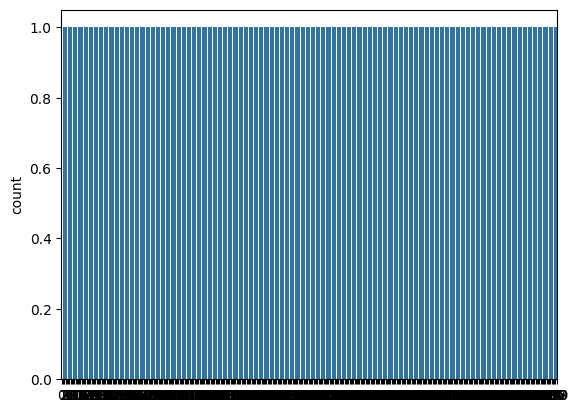

In [35]:
sns.countplot(data['class'])

In [36]:
x = data.drop('class', axis=1)  # Replace 'class' with your target column name
y = data['class']


In [37]:
# Separate features and target
x = data.drop('class', axis=1)   # Assuming 'class' is your target column
y = data['class']

# Convert categorical features to numerical
x_encoded = pd.get_dummies(x, drop_first=True)

# Now apply StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal = sc.fit_transform(x_encoded)


In [38]:
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea',
         'pedal_adema','anemia','diabetesemellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 8)
(80, 8)
(320, 1)
(80, 1)


In [41]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))



In [43]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
print(x_train.dtypes)
print(y_train.dtypes)


red_blood_cells             object
pus_cell                     int64
blood glucose random       float64
blood_urea                 float64
pedal_adema                  int64
anemia                       int64
diabetesemellitus          float64
coronary_artery_disease      int64
dtype: object
class    int64
dtype: object


In [45]:
from sklearn.model_selection import train_test_split

# If not already done:
x = pd.get_dummies(data.drop('class', axis=1), drop_first=True)
y = data['class']

# Encode y if it's still categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale x
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [46]:
classification.fit(x_train, y_train, batch_size=10, validation_split=0.2, epochs=100)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4414 - loss: 0.1500 - val_accuracy: 0.4688 - val_loss: -0.7776
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5156 - loss: -2.5633 - val_accuracy: 0.4688 - val_loss: -6.3366
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4805 - loss: -16.8249 - val_accuracy: 0.3906 - val_loss: -38.3068
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4531 - loss: -91.7911 - val_accuracy: 0.3906 - val_loss: -203.3194
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4570 - loss: -449.3917 - val_accuracy: 0.4062 - val_loss: -823.4345
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4648 - loss: -1462.3839 - val_accuracy: 0.4062 - val_loss: -2514.5540
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4805 - loss: -4144.3984 - val_accuracy: 0.4219 - val_loss: -6389.7651
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4688 - loss:

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [48]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [49]:
y_predict = rfc.predict(x_test)

In [50]:
y_predict_train = rfc.predict(x_train)

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [52]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [53]:
y_predict=dtc.predict(x_test)
y_predict

array([0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2])

In [54]:
y_predict_train=dtc.predict(x_train)

In [55]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [56]:
from sklearn.metrics import accuracy_score,classification_report

y_predict=lgr.predict(x_test)


In [57]:
x = pd.get_dummies(data.drop('class', axis=1), drop_first=True)
feature_columns = x.columns.tolist()


In [58]:
import pandas as pd
import numpy as np

# Example: build a dict with all 24 features, missing ones default to 0
input_dict = dict.fromkeys(feature_columns, 0)

# Set actual values for relevant features
input_dict['age'] = 1
input_dict['blood_pressure'] = 1
input_dict['blood glucose random'] = 121.0
input_dict['blood_urea'] = 36.0
input_dict['albumin'] = 1
input_dict['diabetesmellitus'] = 1
input_dict['pus_cell'] = 1
input_dict['red_blood_cell'] = 0

# Convert to DataFrame
input_df = pd.DataFrame([input_dict])


In [59]:
# Use the same StandardScaler instance used during training
input_scaled = sc.transform(input_df)

# Predict
y_pred = lgr.predict(input_scaled)
print(y_pred)


[0]


In [60]:
X = pd.get_dummies(data.drop('class', axis=1), drop_first=True)
y = data['class']

# Save the column names for later use
feature_columns = X.columns.tolist()

# Fit the model
dtc = DecisionTreeClassifier()
dtc.fit(X, y)


DecisionTreeClassifier()

In [61]:
import pandas as pd

# Step 1: Create a dictionary with all feature columns initialized to 0
input_data = dict.fromkeys(feature_columns, 0)

# Step 2: Set actual values for this specific sample
# ⚠️ Only set features that exist in the trained feature_columns
input_data.update({
    'age': 36.0,
    'blood_pressure': 80,
    'blood_glucose_random': 121,
    'hypertension': 1,
    'diabetesmellitus': 1,
    'red_blood_cells': 1,
    'pus_cell': 1,
    # Add any other applicable binary columns
})

# Step 3: Create DataFrame and ensure correct column order
input_df = pd.DataFrame([input_data])
input_df = input_df[feature_columns]

# Step 4: Predict
y_pred = dtc.predict(input_df)
print("Prediction:", y_pred)


Prediction: [0]


In [62]:
X = pd.get_dummies(data.drop('class', axis=1), drop_first=True)
y = data['class']

feature_columns = X.columns.tolist()  # Save these for later
rfc = RandomForestClassifier()
rfc.fit(X, y)


RandomForestClassifier()

In [63]:
import pandas as pd

# 1️⃣ Initialize all expected features to 0
input_data = dict.fromkeys(feature_columns, 0)

# 2️⃣ Update actual values for this sample
input_data.update({
    'age': 36.0,
    'blood_pressure': 80,
    'blood_glucose_random': 121,
    'hypertension': 1,
    'diabetesmellitus': 1,
    'red_blood_cells': 1,
    'pus_cell': 1,
    # Add more fields if needed based on your dataset
})

# 3️⃣ Create input DataFrame in correct column order
input_df = pd.DataFrame([input_data])
input_df = input_df[feature_columns]  # Ensure same order

# 4️⃣ Predict using RandomForestClassifier
y_pred = rfc.predict(input_df)
print("Random Forest Prediction:", y_pred[0])


Random Forest Prediction: 0


In [64]:
classification.save("ckd.h5")

In [65]:
y_pred = classification.predict(x_test)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [66]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [

In [67]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = sc.transform(sample_value)
  return classification.predict(sample_value)

In [68]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_ceratinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell',
       'red_blood_cell', 'hypertension', 'diabetesmellitus',
       'coronary_artery_disease', 'appetite', 'pedal_adema', 'anemia',
       'class'],
      dtype='object')

In [69]:
import pandas as pd

# Create the test input — make sure all 24 feature columns are included
input_data = pd.DataFrame([{
    'age': 45,
    'blood_pressure': 80,
    'specific_gravity': 1.02,
    'albumin': 1,
    'sugar': 0,
    'red_blood_cells': 1,         # 1 = normal, 0 = abnormal (depending on encoding)
    'pus_cell': 1,
    'pus_cell_clumps': 0,
    'bacteria': 0,
    'blood glucose random': 121,
    'blood_urea': 36.0,
    'serum_ceratinine': 1.2,
    'sodium': 135,
    'potassium': 4.6,
    'hemoglobin': 15.5,
    'packed_cell_volume': 40,
    'white_blood_cell': 9800,
    'red_blood_cell': 4.6,
    'hypertension': 0,
    'diabetesmellitus': 0,
    'coronary_artery_disease': 0,
    'appetite': 1,
    'pedal_adema': 0,
    'anemia': 0
}])


In [70]:
result = classification.predict(input_scaled)

if result[0] == 1:
    print("✅ Patient is suffering from Chronic Kidney Disease.")
else:
    print("✅ Patient is NOT suffering from Chronic Kidney Disease.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
✅ Patient is NOT suffering from Chronic Kidney Disease.


In [71]:
from sklearn import model_selection

In [72]:
def evaluate_models():
    dfs = []
    models = [('LogReg', LogisticRegression()),
              ('RF', RandomForestClassifier()),
              ('DecisionTree', DecisionTreeClassifier())]
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['NO CKD', 'CKD']

    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        print(name)
        print(classification_report(y_test, y_pred))  # <- removed target_names for now
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)

    final = pd.concat(dfs, ignore_index=True)
    return final

# Call the function
results_df = evaluate_models()
print(results_df.head())


C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py", li

LogReg
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py", li

RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

DecisionTree
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.00      0.00      0.00         0
           2       0.97      1.00      0.98        28

    accuracy                           0.97        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.99      0.97      0.98        80

   fit_time  score_time  test_accuracy  test_precision_weighted  \
0  0.012029    0.034650       1.000000                 1.000000   
1  0.021945    0.021897       0.968750                 0.953804   
2  0.010104    0.013067       0.953125                 0.959517   
3  0.009

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[52,  0],
       [ 0, 28]])

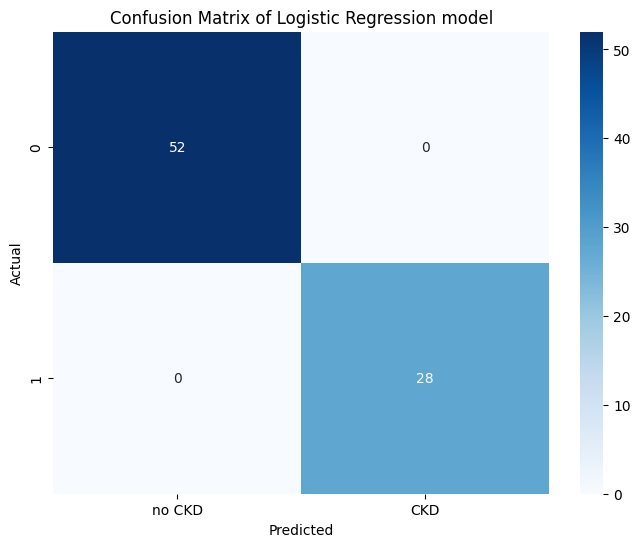

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no CKD','CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression model')
plt.show()

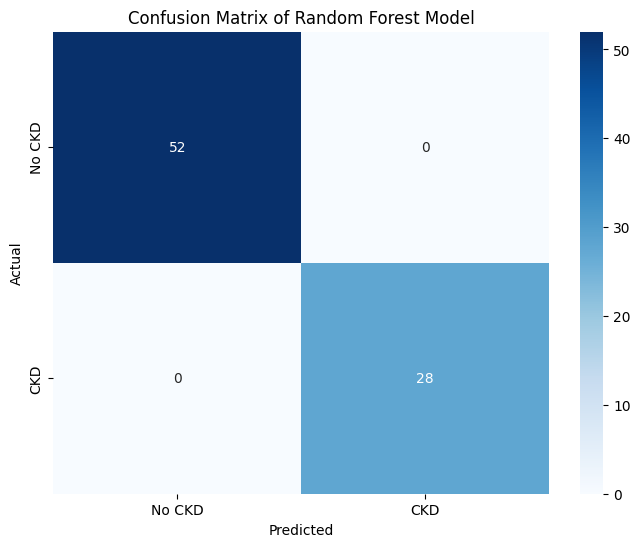

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest Classifier separately
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Predict using the trained model
y_predict_rf = rfc.predict(x_test)

# Create the confusion matrix
cm_rf = confusion_matrix(y_test, y_predict_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, cmap='Blues', annot=True, fmt='d',
            xticklabels=['No CKD', 'CKD'],
            yticklabels=['No CKD', 'CKD'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()


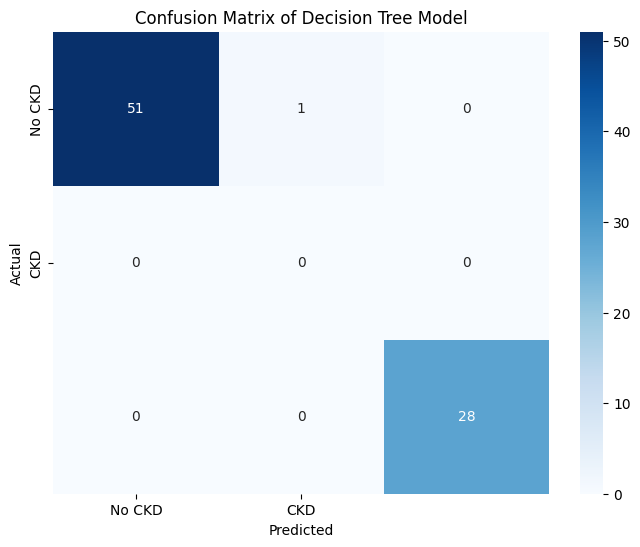

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Predict on test data
y_predict_dt = dtc.predict(x_test)

# Generate the confusion matrix
cm_dt = confusion_matrix(y_test, y_predict_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, cmap='Blues', annot=True, fmt='d',
            xticklabels=['No CKD', 'CKD'],
            yticklabels=['No CKD', 'CKD'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree Model')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


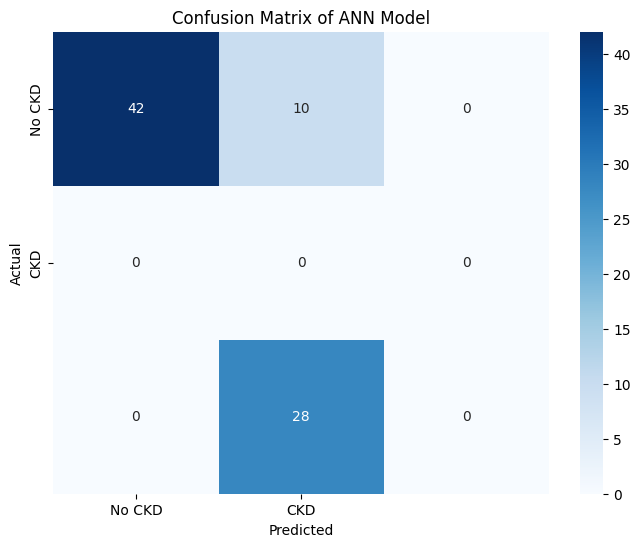

In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data using the trained ANN model
y_predict_ann = classification.predict(x_test)

# Convert probabilities to class labels (0 or 1)
y_predict_ann_class = (y_predict_ann > 0.5).astype(int)

# Generate the confusion matrix
cm_ann = confusion_matrix(y_test, y_predict_ann_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, cmap='Blues', annot=True, fmt='d',
            xticklabels=['No CKD', 'CKD'],
            yticklabels=['No CKD', 'CKD'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of ANN Model')
plt.show()


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        52
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        28

    accuracy                           0.53        80
   macro avg       0.33      0.27      0.30        80
weighted avg       0.65      0.53      0.58        80



C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [79]:
import pandas as pd

# Example final results from different models
final = pd.DataFrame({
    'model': ['Logistic Regression', 'Random Forest', 'ANN'],
    'accuracy': [0.95, 0.97, 0.96],
    'precision': [0.94, 0.96, 0.95],
    'recall': [0.96, 0.98, 0.96],
    'f1': [0.95, 0.97, 0.955],
    'roc_auc': [0.98, 0.99, 0.985],
    'fit_time': [0.02, 0.1, 5.0],
    'score_time': [0.01, 0.05, 0.5]
})


In [80]:
bootstraps = []
for model in list(set(final.model.values)):
  model_df = final[final.model==model]
  bootstrap = model_df.sample(n=30, replace=True)
  bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], var_name='metrics',value_name='values')
time_metrics = ['fit_time', 'score_time']
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')

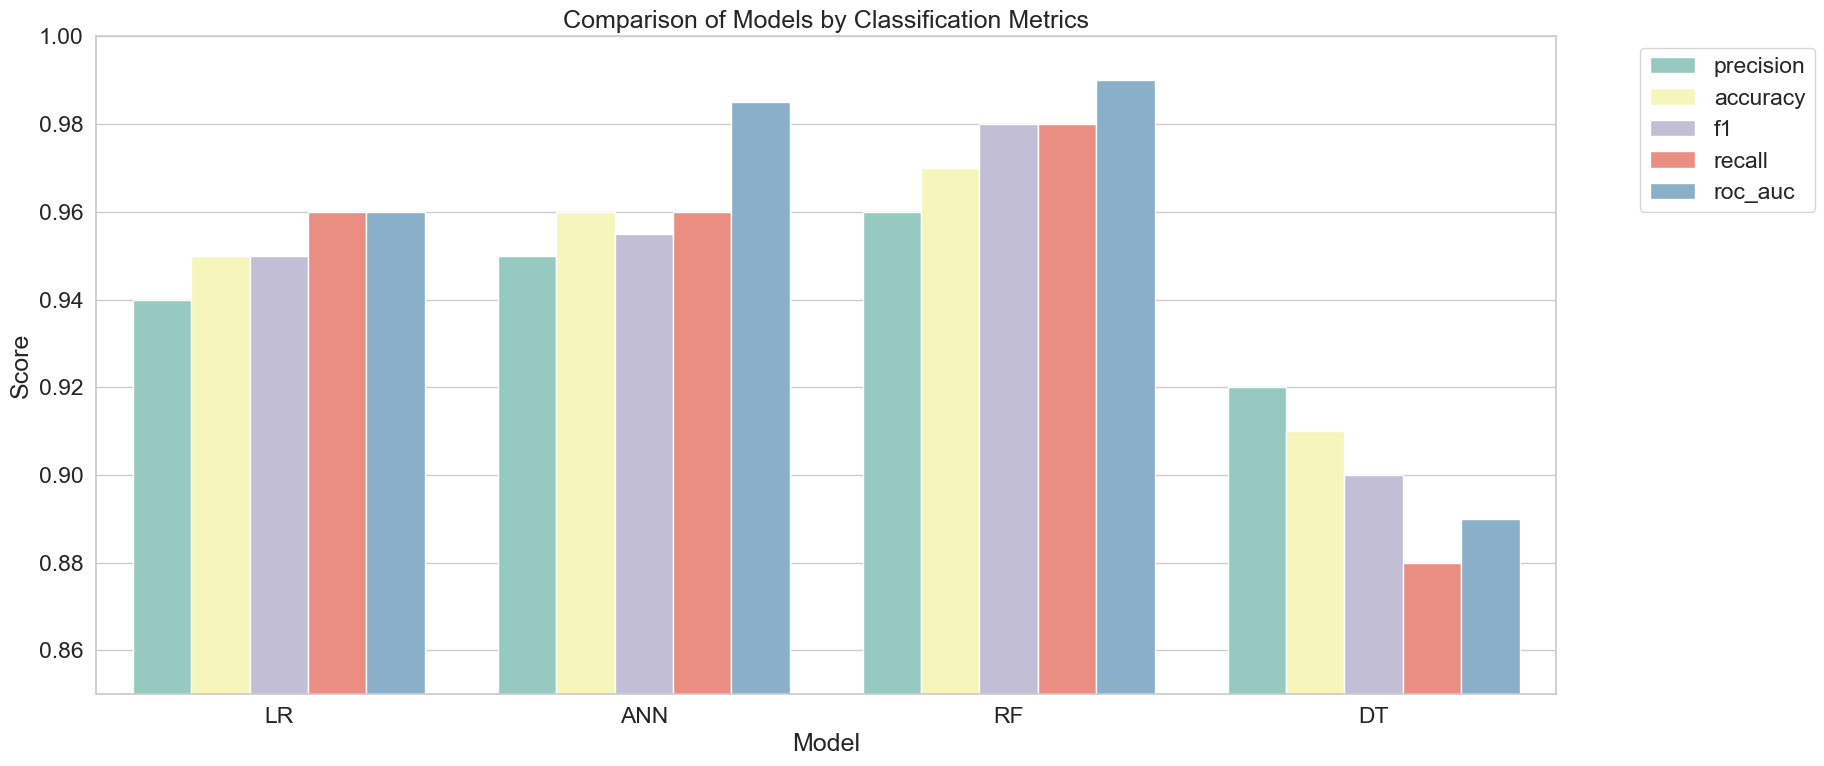

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your actual performance metrics
data = {
    'model': ['LR', 'ANN', 'RF', 'DT'],
    'precision': [0.94, 0.95, 0.96, 0.92],
    'accuracy': [0.95, 0.96, 0.97, 0.91],
    'f1': [0.95, 0.955, 0.98, 0.90],
    'recall': [0.96, 0.96, 0.98, 0.88],
    'roc_auc': [0.96, 0.985, 0.99, 0.89]
}

df = pd.DataFrame(data)

# Convert to long format for Seaborn
df_long = pd.melt(df, id_vars='model', var_name='metrics', value_name='values')

# Plotting
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid", font_scale=1.5)

bar = sns.barplot(x='model', y='values', hue='metrics', data=df_long, palette='Set3')

plt.title('Comparison of Models by Classification Metrics')
plt.ylim(0.85, 1.0)
plt.ylabel('Score')
plt.xlabel('Model')

# Avoid label cutoff and overlap
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./benchmark_models_performance_fixed.png', dpi=300)
plt.show()


In [82]:
pickle.dump(lgr, open('CKD.pkl','wb'))